In [3]:
## Question 2
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#input parameters
num_room = 50
rent_per_day = 105
operational_cost = 45
chance_notshowup = 0.1
chance_showup = 1 - chance_notshowup
overbook_refund = 105 + 150
reservation_limit = 56

(array([  25.,  181.,  533., 1056.,    0., 1500., 1756., 1718., 2998.,
         233.]),
 array([2100. , 2293.5, 2487. , 2680.5, 2874. , 3067.5, 3261. , 3454.5,
        3648. , 3841.5, 4035. ]),
 <a list of 10 Patch objects>)

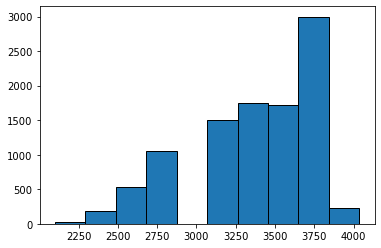

In [12]:
# 2.a. 
# simulation trials 
rd.seed(101010)
trials = 10000
sample = list()
for i in range (trials):
    num_showup = 0
    for c in range (reservation_limit):
        p1 = rd.uniform(0,1)
        if p1 < chance_showup: 
            num_showup += 1
    if num_showup < num_room:
        rented_room = num_showup
        overbooks = 0
    else:
        rented_room = num_room
        overbooks = num_showup - num_room
    no_show =  reservation_limit - num_showup
    showup_revenue = num_showup * rent_per_day
    no_show_revenue = no_show * rent_per_day
    operation_cost = rented_room * operational_cost
    overbook_cost = overbooks * overbook_refund
    total_cost = operation_cost + overbook_cost
    total_revenue = showup_revenue + no_show_revenue
    total_profit = total_revenue - total_cost
    
    sample.append(total_profit)
                
            
plt.hist(sample, edgecolor = 'k')
        

In [13]:
#2.b.
sample_mean = np.mean(sample)
print('The estimate of the mean total profit is $%5.2f' % sample_mean)

The estimate of the mean total profit is $3378.80


In [14]:
#2.c. 
sample_mean = np.mean(sample)
sample_std = np.std(sample)
moe = 1.645*sample_std/len(sample)**0.5
lci = sample_mean - moe
uci = sample_mean + moe
print('Margin of error = %5.2f'% moe)
print('Lower confidence interval = %5.2f'% lci)
print('Upper confidence interval = %5.2f'% uci)
print('The 95%% confidence interval for the sample mean is (%6.2f, %6.2f)'% (lci,uci))

Margin of error =  6.25
Lower confidence interval = 3372.55
Upper confidence interval = 3385.05
The 95% confidence interval for the sample mean is (3372.55, 3385.05)


In [15]:
#2.d.
proportion = sum(1 for x in sample if x > 3800)/len(sample)
print('There is a %5.2f%% probability of making a profit of at least $3800 on one day.'% (100*proportion))

There is a  5.21% probability of making a profit of at least $3800 on one day.


In [16]:
#2.e.
moe = 1.96*(proportion *(1 - proportion)/len(sample)**0.5)
lci = proportion - moe
if lci < 0.0: lcl = 0.0
uci = proportion + moe

print('The 95%% confidence interval for the sample mean is (%4.2f, %4.2f)'% (lci,uci))

The 95% confidence interval for the sample mean is (0.05, 0.05)


[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]
50
51
52
53
54
55
56
57
58
59


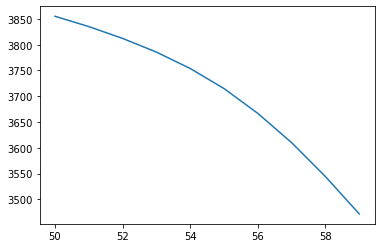

In [17]:
#2.f.
order_maximum = [50 + i for i in range (10)]
print(order_maximum)
mean_profit = list()
trials = 10000
sample = list()
for current_order in order_maximum:
    for i in range (trials):
        num_showup = 0
        for x in range(current_order):
            p1 = rd.uniform(0,1)
            if p1 < chance_showup: 
                num_showup +=1
        if num_showup < num_room:
            rented_room = num_showup
            overbooks = 0
        else:
            rented_room = num_room
            overbooks = num_showup - num_room
        no_show =  reservation_limit - num_showup
        showup_revenue = num_showup * rent_per_day
        no_show_revenue = no_show * rent_per_day
        operation_cost = rented_room * operational_cost
        overbook_cost = overbooks * overbook_refund
        total_cost = operation_cost + overbook_cost
        total_revenue = showup_revenue + no_show_revenue
        total_profit = total_revenue - total_cost
        sample.append(total_profit)
    profit_mean = np.mean(sample)
        #print(current_order, i)
    mean_profit.append(profit_mean)
    print(current_order)
plt.plot(order_maximum, mean_profit)        

In [18]:
order_maximum[mean_profit.index(max(mean_profit))]

50

In [19]:
# Question 1
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#input parameters
num_homes = 20
chance_someonehome = 0.8
chance_purchase = 0.3
purchase_mean = 25
purchase_stdev = 5

(array([ 290., 1182., 2530., 2809., 1903.,  884.,  311.,   68.,   19.,
           4.]),
 array([  0.        ,  35.21275169,  70.42550339, 105.63825508,
        140.85100677, 176.06375846, 211.27651016, 246.48926185,
        281.70201354, 316.91476523, 352.12751693]),
 <a list of 10 Patch objects>)

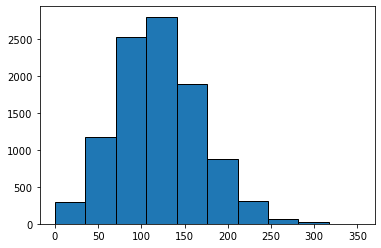

In [21]:
#simulation trials
rd.seed(101010)
trials = 10000
sample = list()
for i in range (trials):
    total_revenue = 0
    for h in range (num_homes):
        perc_someonehome = rd.uniform(0,1)
        perc_purchase = rd.uniform(0,1)
        if perc_someonehome <= chance_someonehome and perc_purchase < chance_purchase:
            purchase = rd.normalvariate(purchase_mean, purchase_stdev)
            total_revenue = total_revenue + purchase 
    
    sample.append(total_revenue)
    
plt.hist(sample, edgecolor = 'k')

In [22]:
#1.a.
print('The total amount of revenue can be expected to generate from this neighborhood is $%5.2f' % np.mean(sample))

The total amount of revenue can be expected to generate from this neighborhood is $120.31


In [23]:
#1.b.
sample_mean = np.mean(sample)
sample_std = np.std(sample)
moe = 1.96*sample_std/len(sample)**0.5
lowerCI = sample_mean - moe
upperCI = sample_mean + moe
print('Margin of error = %5.2f'% moe)
print('Lower confidence interval = %5.2f'% lowerCI)
print('Upper confidence interval = %5.2f'% upperCI)

Margin of error =  0.95
Lower confidence interval = 119.35
Upper confidence interval = 121.26


In [24]:
#1.c.
proportion = 100*sum(1 for i in sample if i > 200.00)/len(sample)
print('There is a %5.2f%% chance the nonprofit will collect more than $200' % proportion)

There is a  5.95% chance the nonprofit will collect more than $200


In [25]:
#1.d. 
moe = 1.645*(proportion *(proportion)/len(sample)**0.5)
lci = proportion - moe
uci = proportion + moe
print('Lower confidence interval = %6.2f%%'% lci)
print('Upper confidence interval = %6.2f%%'% uci)

Lower confidence interval =   5.37%
Upper confidence interval =   6.53%
